# Predicción de tarifas de taxis

In [15]:
# Importando librerías
import pandas as pd
import numpy as np
import warnings
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ignoramos los futuros warnings
warnings.filterwarnings("ignore")

In [3]:
# Cargando datos

'''
    Aquí cada uno escribira su propia ruta para no subir el archivo dado que es demasiado pasado
'''

# Ruta de Danilo
nombre_archivo ='../../PracticaCalificada2-CC421/train.csv'

# Ruta de Victor
#nombre_archivo ='D:/Nueva carpeta (4)/UNI-21-I/IA/PracticaCalificada2-CC421/PracticaCalificada2-CC421/train.csv'

# Ruta de William
#nombre_archivo ='../train.csv'

# Ruta de Bryan
#nombre_archivo ='../train.csv'


# Cargando los datos
# Estoy usando una menor cantidad de data ya que mi hardware no soporta los 55 millones de datos y demora mucho varias veces 
# Si se desea trabajar con toda la data completa borrar nrows = 1000000  un millon de datos
df = pd.read_csv(nombre_archivo)

In [4]:
# Tomando una muestra  aleatoria
df = df.sample(1000000, random_state = 42, replace = True).copy()

## 1. Análisis de Datos

In [5]:
# Visualización de los 30 primeros datos
df.head(30)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
41166218,2013-04-24 12:14:48.0000004,4.50,2013-04-24 12:14:48 UTC,-74.000760,40.738938,-73.991350,40.735008,1
3712087,2011-04-16 23:38:02.0000004,6.90,2011-04-16 23:38:02 UTC,-73.987507,40.733042,-73.990443,40.719439,1
9063974,2011-10-30 02:20:17.0000003,7.70,2011-10-30 02:20:17 UTC,-73.993268,40.767820,-73.981512,40.749880,2
32884828,2011-09-15 16:36:51.0000003,42.90,2011-09-15 16:36:51 UTC,-73.872997,40.774174,-73.928177,40.860049,1
19541392,2015-06-20 11:26:25.0000002,11.50,2015-06-20 11:26:25 UTC,-73.975616,40.782085,-73.978401,40.754215,1
41364495,2014-12-26 19:19:18.0000002,6.00,2014-12-26 19:19:18 UTC,-73.991995,40.726503,-74.005065,40.719288,1
30172965,2012-02-22 09:27:00.00000064,5.30,2012-02-22 09:27:00 UTC,-73.955572,40.779515,-73.962470,40.775857,1
48772237,2015-03-14 20:14:43.0000002,5.50,2015-03-14 20:14:43 UTC,-73.965797,40.795280,-73.977776,40.778763,1
38435661,2013-08-23 15:18:00.00000096,10.50,2013-08-23 15:18:00 UTC,-73.956798,40.778065,-73.974985,40.765362,1
23767641,2015-01-18 11:09:24.0000006,5.00,2015-01-18 11:09:24 UTC,-73.903381,40.745567,-73.899887,40.738960,1


In [6]:
# Cantidad de instancias y atributos (filas x columndas)

print("Cantidad de Instancias: "+str(df.shape[0]))
print("Cantidad de Atributos: "+str(df.shape[1]))

Cantidad de Instancias: 1000000
Cantidad de Atributos: 8


In [7]:
# Visualización de los tipos de datos del dataframe
df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [8]:
# Descripción actual de algunas mediciones 
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999989.000000,999989.000000,1000000.000000
mean,11.369523,-72.570100,40.011269,-72.569004,39.958460,1.695592
std,12.436400,10.477065,14.585175,11.328398,7.081197,1.467413
min,-45.000000,-740.000000,-487.724237,-1852.783333,-74.008283,0.000000
25%,6.000000,-73.991997,40.735188,-73.991455,40.734087,1.000000
50%,8.500000,-73.981774,40.752792,-73.980209,40.753240,1.000000
75%,12.500000,-73.967153,40.767263,-73.963843,40.767979,2.000000
max,3130.300000,40.813802,3210.337405,40.811737,1261.268232,208.000000


In [9]:
# Verificando la correlación de las caracteristicas

'''
    Nota: Necesitan ser trabajadas dando que hay mucha dependencia entre características y poca correlación
        con la característica a predecir.
'''

df.corr(method='pearson')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.007559,-0.003665,0.004641,-0.007590,0.008320
pickup_longitude,0.007559,1.000000,-0.369738,0.835155,-0.767935,0.011449
pickup_latitude,-0.003665,-0.369738,1.000000,-0.343807,0.289090,-0.005989
dropoff_longitude,0.004641,0.835155,-0.343807,1.000000,-0.788232,0.010153
dropoff_latitude,-0.007590,-0.767935,0.289090,-0.788232,1.000000,-0.009740
passenger_count,0.008320,0.011449,-0.005989,0.010153,-0.009740,1.000000


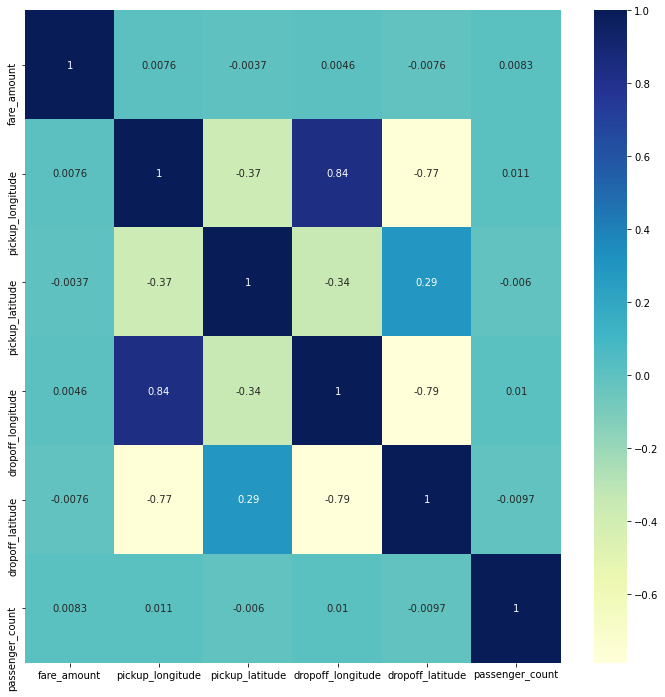

In [10]:
plt.figure(figsize=(12,12))

correlacion = df.corr(method='pearson')

sns.heatmap(correlacion, annot=True,  cmap="YlGnBu")
plt.show()

In [11]:
# Verificando la cantidad de datos corrompidos o nulos

df.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    11
dropoff_latitude     11
passenger_count       0
dtype: int64

In [12]:
df.sort_values('pickup_datetime')

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
7643440,2009-01-01 00:19:48.0000006,8.6,2009-01-01 00:19:48 UTC,-73.966875,40.772625,-73.976930,40.790186,2
7643440,2009-01-01 00:19:48.0000006,8.6,2009-01-01 00:19:48 UTC,-73.966875,40.772625,-73.976930,40.790186,2
7643440,2009-01-01 00:19:48.0000006,8.6,2009-01-01 00:19:48 UTC,-73.966875,40.772625,-73.976930,40.790186,2
7643440,2009-01-01 00:19:48.0000006,8.6,2009-01-01 00:19:48 UTC,-73.966875,40.772625,-73.976930,40.790186,2
7643440,2009-01-01 00:19:48.0000006,8.6,2009-01-01 00:19:48 UTC,-73.966875,40.772625,-73.976930,40.790186,2
...,...,...,...,...,...,...,...,...
13844988,2015-06-30 22:03:54.0000003,5.5,2015-06-30 22:03:54 UTC,-73.994026,40.736351,-73.999527,40.743916,1
13844988,2015-06-30 22:03:54.0000003,5.5,2015-06-30 22:03:54 UTC,-73.994026,40.736351,-73.999527,40.743916,1
13844988,2015-06-30 22:03:54.0000003,5.5,2015-06-30 22:03:54 UTC,-73.994026,40.736351,-73.999527,40.743916,1
13844988,2015-06-30 22:03:54.0000003,5.5,2015-06-30 22:03:54 UTC,-73.994026,40.736351,-73.999527,40.743916,1


## 2. Procesamiento de Datos

In [13]:
# Eliminamos 'key' ya que esta característica no aporta información relevante
df.drop(columns=['key'], inplace=True)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
41166218,4.5,2013-04-24 12:14:48 UTC,-74.000760,40.738938,-73.991350,40.735008,1
3712087,6.9,2011-04-16 23:38:02 UTC,-73.987507,40.733042,-73.990443,40.719439,1
9063974,7.7,2011-10-30 02:20:17 UTC,-73.993268,40.767820,-73.981512,40.749880,2
32884828,42.9,2011-09-15 16:36:51 UTC,-73.872997,40.774174,-73.928177,40.860049,1
19541392,11.5,2015-06-20 11:26:25 UTC,-73.975616,40.782085,-73.978401,40.754215,1
...,...,...,...,...,...,...,...
30211823,6.1,2011-04-05 13:33:00 UTC,-73.970412,40.785728,-73.984760,40.782632,5
45814058,12.5,2014-06-08 22:11:52 UTC,-73.996306,40.748286,-73.985572,40.722924,1
26651509,6.1,2010-08-03 22:42:00 UTC,-73.960352,40.775500,-73.945230,40.773440,1
51669347,10.0,2013-05-09 19:19:19 UTC,-73.967102,40.766888,-73.977302,40.753928,1


In [14]:
# Eliminaremos los datos nulos y duplicados dado que la cantidad de estos es insignificante para la población

df_new = df.drop_duplicates()
df_new.dropna(inplace=True)
df_new

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
41166218,4.5,2013-04-24 12:14:48 UTC,-74.000760,40.738938,-73.991350,40.735008,1
3712087,6.9,2011-04-16 23:38:02 UTC,-73.987507,40.733042,-73.990443,40.719439,1
9063974,7.7,2011-10-30 02:20:17 UTC,-73.993268,40.767820,-73.981512,40.749880,2
32884828,42.9,2011-09-15 16:36:51 UTC,-73.872997,40.774174,-73.928177,40.860049,1
19541392,11.5,2015-06-20 11:26:25 UTC,-73.975616,40.782085,-73.978401,40.754215,1
...,...,...,...,...,...,...,...
38155333,12.9,2010-09-25 15:42:49 UTC,-73.983640,40.752963,-73.998213,40.724849,1
9201636,15.5,2014-09-05 20:18:00 UTC,-74.008230,40.738857,-73.969027,40.764062,6
8089663,9.5,2014-04-04 16:22:00 UTC,-73.973060,40.780457,-73.983910,40.760197,1
36579257,4.5,2014-01-07 17:20:38 UTC,-73.987843,40.750736,-73.990659,40.758680,1


## 3. Tratamiento de Datos

### Trabajando la fecha

In [16]:
# Separamos los dias meses años y horas 
# Se cita https://stackoverflow.com/questions/53914889/extract-day-of-month-as-array-from-datetime-column

df_new['pickup_datetime'] = pd.to_datetime(df_new['pickup_datetime'], errors='coerce')
df_new['day']=df_new['pickup_datetime'].dt.day.values
df_new['month']=df_new['pickup_datetime'].dt.month.values
df_new['year']=df_new['pickup_datetime'].dt.year.values
df_new['hours']=df_new['pickup_datetime'].dt.hour.values

### Trabajando los pasajeros

In [17]:
# Observamos que hay pasajeros = 0 , no deberia ocurrir
df_new.groupby("passenger_count")["passenger_count"].count()


passenger_count
0        365
1      68747
2      14871
3       4431
4       2184
5       7192
6       2110
8          1
9          1
208        1
Name: passenger_count, dtype: int64

In [20]:
df_new2=df_new[(df_new["passenger_count"]> 0) & (df_new["passenger_count"] <=6)]

### Trabajando el monto a pagar

In [22]:
# Limpiamos la data , especificamente cuendo hay pasajeros = 0

df_new3=df_new2[(df_new2["fare_amount"]> 2.5) & (df_new2["fare_amount"]<= 120.0)]
df_new3

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours
41166218,4.5,2013-04-24 12:14:48+00:00,-74.000760,40.738938,-73.991350,40.735008,1,24,4,2013,12
3712087,6.9,2011-04-16 23:38:02+00:00,-73.987507,40.733042,-73.990443,40.719439,1,16,4,2011,23
9063974,7.7,2011-10-30 02:20:17+00:00,-73.993268,40.767820,-73.981512,40.749880,2,30,10,2011,2
32884828,42.9,2011-09-15 16:36:51+00:00,-73.872997,40.774174,-73.928177,40.860049,1,15,9,2011,16
19541392,11.5,2015-06-20 11:26:25+00:00,-73.975616,40.782085,-73.978401,40.754215,1,20,6,2015,11
...,...,...,...,...,...,...,...,...,...,...,...
38155333,12.9,2010-09-25 15:42:49+00:00,-73.983640,40.752963,-73.998213,40.724849,1,25,9,2010,15
9201636,15.5,2014-09-05 20:18:00+00:00,-74.008230,40.738857,-73.969027,40.764062,6,5,9,2014,20
8089663,9.5,2014-04-04 16:22:00+00:00,-73.973060,40.780457,-73.983910,40.760197,1,4,4,2014,16
36579257,4.5,2014-01-07 17:20:38+00:00,-73.987843,40.750736,-73.990659,40.758680,1,7,1,2014,17


### Trabajando las longitudes y latitudes

In [23]:
df_new4=df_new3[(df_new3["pickup_longitude"] !=0.0)] 
df_new4.reset_index(drop=True, inplace=True)
df_new4

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours
0,4.5,2013-04-24 12:14:48+00:00,-74.000760,40.738938,-73.991350,40.735008,1,24,4,2013,12
1,6.9,2011-04-16 23:38:02+00:00,-73.987507,40.733042,-73.990443,40.719439,1,16,4,2011,23
2,7.7,2011-10-30 02:20:17+00:00,-73.993268,40.767820,-73.981512,40.749880,2,30,10,2011,2
3,42.9,2011-09-15 16:36:51+00:00,-73.872997,40.774174,-73.928177,40.860049,1,15,9,2011,16
4,11.5,2015-06-20 11:26:25+00:00,-73.975616,40.782085,-73.978401,40.754215,1,20,6,2015,11
...,...,...,...,...,...,...,...,...,...,...,...
97319,12.9,2010-09-25 15:42:49+00:00,-73.983640,40.752963,-73.998213,40.724849,1,25,9,2010,15
97320,15.5,2014-09-05 20:18:00+00:00,-74.008230,40.738857,-73.969027,40.764062,6,5,9,2014,20
97321,9.5,2014-04-04 16:22:00+00:00,-73.973060,40.780457,-73.983910,40.760197,1,4,4,2014,16
97322,4.5,2014-01-07 17:20:38+00:00,-73.987843,40.750736,-73.990659,40.758680,1,7,1,2014,17


In [24]:
# Eliminamos filas con longitud y latitud fuera de rango
# Longitudd: -180 a +180
# Latitud: -90 a +90

df_new5=df_new4[(df_new4["pickup_longitude"]>= -180.0) & (df_new4["pickup_longitude"] <=180.0)]
df_new6=df_new5[(df_new5["pickup_latitude"]>= -90.0) & (df_new5["pickup_latitude"]<= 90.0)]

df_new7=df_new6[(df_new6["dropoff_longitude"]>= -180.0) & (df_new6["dropoff_longitude"] <=180.0)]
df_new8=df_new7[(df_new7["dropoff_latitude"]>= -90.0) & (df_new7["dropoff_latitude"]<= 90.0)]

df_new8.reset_index(drop=True, inplace=True)
df_new8.head(30)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours
0,4.50,2013-04-24 12:14:48+00:00,-74.000760,40.738938,-73.991350,40.735008,1,24,4,2013,12
1,6.90,2011-04-16 23:38:02+00:00,-73.987507,40.733042,-73.990443,40.719439,1,16,4,2011,23
2,7.70,2011-10-30 02:20:17+00:00,-73.993268,40.767820,-73.981512,40.749880,2,30,10,2011,2
3,42.90,2011-09-15 16:36:51+00:00,-73.872997,40.774174,-73.928177,40.860049,1,15,9,2011,16
4,11.50,2015-06-20 11:26:25+00:00,-73.975616,40.782085,-73.978401,40.754215,1,20,6,2015,11
5,6.00,2014-12-26 19:19:18+00:00,-73.991995,40.726503,-74.005065,40.719288,1,26,12,2014,19
6,5.30,2012-02-22 09:27:00+00:00,-73.955572,40.779515,-73.962470,40.775857,1,22,2,2012,9
7,5.50,2015-03-14 20:14:43+00:00,-73.965797,40.795280,-73.977776,40.778763,1,14,3,2015,20
8,10.50,2013-08-23 15:18:00+00:00,-73.956798,40.778065,-73.974985,40.765362,1,23,8,2013,15
9,5.00,2015-01-18 11:09:24+00:00,-73.903381,40.745567,-73.899887,40.738960,1,18,1,2015,11


In [26]:
## Con la data ya mas limpia mostramos un resumen de los datos
df_new8.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours
count,97318.000000,97318.000000,97318.000000,97318.000000,97318.000000,97318.000000,97318.000000,97318.000000,97318.000000,97318.000000
mean,11.372166,-73.899845,40.684230,-73.839624,40.651559,1.700415,15.703354,6.253817,2011.733914,13.510841
std,9.559040,2.843617,2.711103,3.537364,2.949829,1.312746,8.675244,3.432651,1.869403,6.530251
min,2.900000,-80.527566,-74.008060,-92.532021,-74.008283,1.000000,1.000000,1.000000,2009.000000,0.000000
25%,6.000000,-73.992233,40.736704,-73.991631,40.735457,1.000000,8.000000,3.000000,2010.000000,9.000000
50%,8.500000,-73.982063,40.753422,-73.980616,40.753868,1.000000,16.000000,6.000000,2012.000000,14.000000
75%,12.500000,-73.968353,40.767642,-73.965342,40.768297,2.000000,23.000000,9.000000,2013.000000,19.000000
max,120.000000,40.813802,49.466667,40.811737,73.981533,6.000000,31.000000,12.000000,2015.000000,23.000000


Text(0, 0.5, 'Frecuencia')

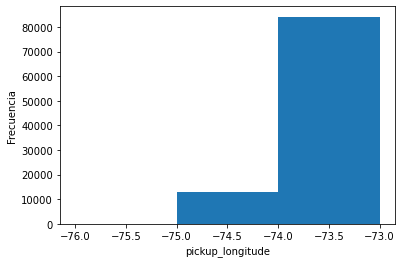

In [28]:
df_new8["pickup_longitude"].plot.hist(alpha=1, stacked=True, bins=list(range(-76, -72, 1)))
plt.xlabel("pickup_longitude")
plt.ylabel("Frecuencia")

In [29]:
df_new10=df_new8[(df_new8["pickup_longitude"]>= -76.0) & (df_new8["pickup_longitude"] <=-72.0)]
df_new10.reset_index(drop=True, inplace=True)
df_new10

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours
0,4.5,2013-04-24 12:14:48+00:00,-74.000760,40.738938,-73.991350,40.735008,1,24,4,2013,12
1,6.9,2011-04-16 23:38:02+00:00,-73.987507,40.733042,-73.990443,40.719439,1,16,4,2011,23
2,7.7,2011-10-30 02:20:17+00:00,-73.993268,40.767820,-73.981512,40.749880,2,30,10,2011,2
3,42.9,2011-09-15 16:36:51+00:00,-73.872997,40.774174,-73.928177,40.860049,1,15,9,2011,16
4,11.5,2015-06-20 11:26:25+00:00,-73.975616,40.782085,-73.978401,40.754215,1,20,6,2015,11
...,...,...,...,...,...,...,...,...,...,...,...
97238,12.9,2010-09-25 15:42:49+00:00,-73.983640,40.752963,-73.998213,40.724849,1,25,9,2010,15
97239,15.5,2014-09-05 20:18:00+00:00,-74.008230,40.738857,-73.969027,40.764062,6,5,9,2014,20
97240,9.5,2014-04-04 16:22:00+00:00,-73.973060,40.780457,-73.983910,40.760197,1,4,4,2014,16
97241,4.5,2014-01-07 17:20:38+00:00,-73.987843,40.750736,-73.990659,40.758680,1,7,1,2014,17


Text(0, 0.5, 'Frecuencia')

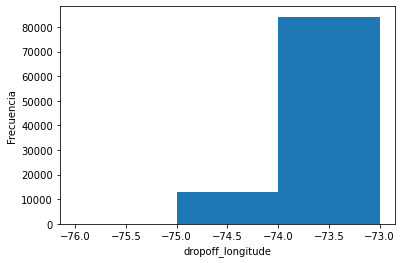

In [30]:
df_new8["dropoff_longitude"].plot.hist(alpha=1, stacked=True, bins=list(range(-76, -72, 1)))
plt.xlabel("dropoff_longitude")
plt.ylabel("Frecuencia")

In [31]:
df_new11=df_new10[(df_new10["dropoff_longitude"]>= -76.0) & (df_new10["dropoff_longitude"] <=-72.0)]
df_new11.reset_index(drop=True, inplace=True)
df_new11

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours
0,4.5,2013-04-24 12:14:48+00:00,-74.000760,40.738938,-73.991350,40.735008,1,24,4,2013,12
1,6.9,2011-04-16 23:38:02+00:00,-73.987507,40.733042,-73.990443,40.719439,1,16,4,2011,23
2,7.7,2011-10-30 02:20:17+00:00,-73.993268,40.767820,-73.981512,40.749880,2,30,10,2011,2
3,42.9,2011-09-15 16:36:51+00:00,-73.872997,40.774174,-73.928177,40.860049,1,15,9,2011,16
4,11.5,2015-06-20 11:26:25+00:00,-73.975616,40.782085,-73.978401,40.754215,1,20,6,2015,11
...,...,...,...,...,...,...,...,...,...,...,...
97149,12.9,2010-09-25 15:42:49+00:00,-73.983640,40.752963,-73.998213,40.724849,1,25,9,2010,15
97150,15.5,2014-09-05 20:18:00+00:00,-74.008230,40.738857,-73.969027,40.764062,6,5,9,2014,20
97151,9.5,2014-04-04 16:22:00+00:00,-73.973060,40.780457,-73.983910,40.760197,1,4,4,2014,16
97152,4.5,2014-01-07 17:20:38+00:00,-73.987843,40.750736,-73.990659,40.758680,1,7,1,2014,17


Text(0, 0.5, 'Frecuencia')

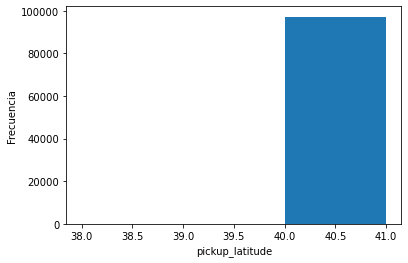

In [32]:
df_new8["pickup_latitude"].plot.hist(alpha=1, stacked=True, bins=list(range(38, 42, 1)))
plt.xlabel("pickup_latitude")
plt.ylabel("Frecuencia")

In [33]:
df_new12=df_new11[(df_new11["pickup_latitude"]>= 38.0) & (df_new11["pickup_latitude"]<= 42.0)]
df_new12.reset_index(drop=True, inplace=True)
df_new12

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours
0,4.5,2013-04-24 12:14:48+00:00,-74.000760,40.738938,-73.991350,40.735008,1,24,4,2013,12
1,6.9,2011-04-16 23:38:02+00:00,-73.987507,40.733042,-73.990443,40.719439,1,16,4,2011,23
2,7.7,2011-10-30 02:20:17+00:00,-73.993268,40.767820,-73.981512,40.749880,2,30,10,2011,2
3,42.9,2011-09-15 16:36:51+00:00,-73.872997,40.774174,-73.928177,40.860049,1,15,9,2011,16
4,11.5,2015-06-20 11:26:25+00:00,-73.975616,40.782085,-73.978401,40.754215,1,20,6,2015,11
...,...,...,...,...,...,...,...,...,...,...,...
97146,12.9,2010-09-25 15:42:49+00:00,-73.983640,40.752963,-73.998213,40.724849,1,25,9,2010,15
97147,15.5,2014-09-05 20:18:00+00:00,-74.008230,40.738857,-73.969027,40.764062,6,5,9,2014,20
97148,9.5,2014-04-04 16:22:00+00:00,-73.973060,40.780457,-73.983910,40.760197,1,4,4,2014,16
97149,4.5,2014-01-07 17:20:38+00:00,-73.987843,40.750736,-73.990659,40.758680,1,7,1,2014,17


Text(0, 0.5, 'Frecuencia')

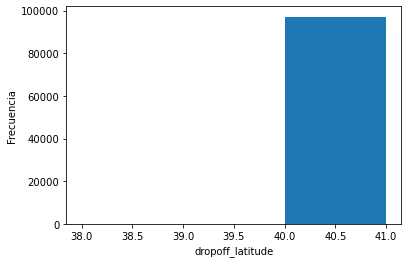

In [34]:
df_new8["dropoff_latitude"].plot.hist(alpha=1, stacked=True, bins=list(range(38, 42, 1)))
plt.xlabel("dropoff_latitude")
plt.ylabel("Frecuencia")

In [35]:
df_new13=df_new12[(df_new12["dropoff_latitude"]>= 38.0) & (df_new12["dropoff_latitude"]<= 42.0)]
df_new13.reset_index(drop=True, inplace=True)
df_new13

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours
0,4.5,2013-04-24 12:14:48+00:00,-74.000760,40.738938,-73.991350,40.735008,1,24,4,2013,12
1,6.9,2011-04-16 23:38:02+00:00,-73.987507,40.733042,-73.990443,40.719439,1,16,4,2011,23
2,7.7,2011-10-30 02:20:17+00:00,-73.993268,40.767820,-73.981512,40.749880,2,30,10,2011,2
3,42.9,2011-09-15 16:36:51+00:00,-73.872997,40.774174,-73.928177,40.860049,1,15,9,2011,16
4,11.5,2015-06-20 11:26:25+00:00,-73.975616,40.782085,-73.978401,40.754215,1,20,6,2015,11
...,...,...,...,...,...,...,...,...,...,...,...
97144,12.9,2010-09-25 15:42:49+00:00,-73.983640,40.752963,-73.998213,40.724849,1,25,9,2010,15
97145,15.5,2014-09-05 20:18:00+00:00,-74.008230,40.738857,-73.969027,40.764062,6,5,9,2014,20
97146,9.5,2014-04-04 16:22:00+00:00,-73.973060,40.780457,-73.983910,40.760197,1,4,4,2014,16
97147,4.5,2014-01-07 17:20:38+00:00,-73.987843,40.750736,-73.990659,40.758680,1,7,1,2014,17


In [36]:
# Se cita https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula
# Hallamos una distancia para poder aprovecharr la latitud y longitud y trabajar con la distancia

from math import radians,cos,sin,asin,atan2

def distance(lonx,lony,latx,laty):
    lonx =np.radians(lonx)
    lony =np.radians(lony)
    latx =np.radians(latx)
    laty =np.radians(laty)

    d_lon=(lony-lonx)
    d_lat=(laty-latx)
    a = sin(d_lat/2.0)**2+cos(latx)*cos(laty)*sin(d_lon/2.0)**2
    c = 2 * asin(a**(1/2))
    
    ##distancia William
    #a = sin(d_lat/2)**2+cos(latx)*cos(laty)*sin(d_lon/2)**2
    #a=sin(latx)*sin(laty)+(sin(latx)*sin(laty)*cos(d_lon))
    #c = 2 * atan2(a**(1/2),(1-a)**2)
    #r=6378.0
    #distancia=round(r*c,2)
    #return(distancia)
    
    distancia=round(6371*c,2)
    return(distancia)

    #a = sin(d_lat/2)**2+cos(latx)*cos(laty)*sin(d_lon/2)**2
    #a=sin(latx)*sin(laty)+(sin(latx)*sin(laty)*cos(d_lon))
    #c = 2 * atan2(a**(1/2),(1-a)**2)



dis=[]


for i in range(df_new13.shape[0]):
    dis.append(distance(df_new13["pickup_longitude"][i],
                        df_new13["dropoff_longitude"][i],
                        df_new13["pickup_latitude"][i],
                        df_new13["dropoff_latitude"][i]))


df_new13["distancia"] = dis
df_new13


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours,distancia
0,4.5,2013-04-24 12:14:48+00:00,-74.000760,40.738938,-73.991350,40.735008,1,24,4,2013,12,0.91
1,6.9,2011-04-16 23:38:02+00:00,-73.987507,40.733042,-73.990443,40.719439,1,16,4,2011,23,1.53
2,7.7,2011-10-30 02:20:17+00:00,-73.993268,40.767820,-73.981512,40.749880,2,30,10,2011,2,2.23
3,42.9,2011-09-15 16:36:51+00:00,-73.872997,40.774174,-73.928177,40.860049,1,15,9,2011,16,10.62
4,11.5,2015-06-20 11:26:25+00:00,-73.975616,40.782085,-73.978401,40.754215,1,20,6,2015,11,3.11
...,...,...,...,...,...,...,...,...,...,...,...,...
97144,12.9,2010-09-25 15:42:49+00:00,-73.983640,40.752963,-73.998213,40.724849,1,25,9,2010,15,3.36
97145,15.5,2014-09-05 20:18:00+00:00,-74.008230,40.738857,-73.969027,40.764062,6,5,9,2014,20,4.33
97146,9.5,2014-04-04 16:22:00+00:00,-73.973060,40.780457,-73.983910,40.760197,1,4,4,2014,16,2.43
97147,4.5,2014-01-07 17:20:38+00:00,-73.987843,40.750736,-73.990659,40.758680,1,7,1,2014,17,0.91


Text(0, 0.5, 'Frecuencia')

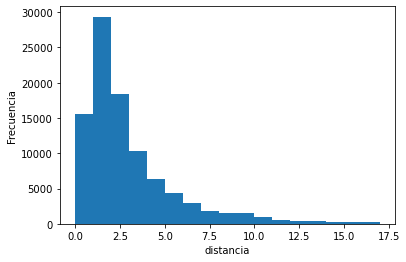

In [41]:
#f, axes = plt.subplots(figsize = (16,16))
#sns.distplot(df_new9['distancia'])

df_new13["distancia"].plot.hist(alpha=1, stacked=True, bins=list(range(0, 18, 1)))
plt.xlabel("distancia")
plt.ylabel("Frecuencia")

In [42]:
df_final=df_new13[(df_new13["distancia"] >= 0.01) & (df_new13["distancia"] <= 18.00)] 
df_final.reset_index(drop=True, inplace=True)
df_final

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours,distancia
0,4.5,2013-04-24 12:14:48+00:00,-74.000760,40.738938,-73.991350,40.735008,1,24,4,2013,12,0.91
1,6.9,2011-04-16 23:38:02+00:00,-73.987507,40.733042,-73.990443,40.719439,1,16,4,2011,23,1.53
2,7.7,2011-10-30 02:20:17+00:00,-73.993268,40.767820,-73.981512,40.749880,2,30,10,2011,2,2.23
3,42.9,2011-09-15 16:36:51+00:00,-73.872997,40.774174,-73.928177,40.860049,1,15,9,2011,16,10.62
4,11.5,2015-06-20 11:26:25+00:00,-73.975616,40.782085,-73.978401,40.754215,1,20,6,2015,11,3.11
...,...,...,...,...,...,...,...,...,...,...,...,...
94370,12.9,2010-09-25 15:42:49+00:00,-73.983640,40.752963,-73.998213,40.724849,1,25,9,2010,15,3.36
94371,15.5,2014-09-05 20:18:00+00:00,-74.008230,40.738857,-73.969027,40.764062,6,5,9,2014,20,4.33
94372,9.5,2014-04-04 16:22:00+00:00,-73.973060,40.780457,-73.983910,40.760197,1,4,4,2014,16,2.43
94373,4.5,2014-01-07 17:20:38+00:00,-73.987843,40.750736,-73.990659,40.758680,1,7,1,2014,17,0.91


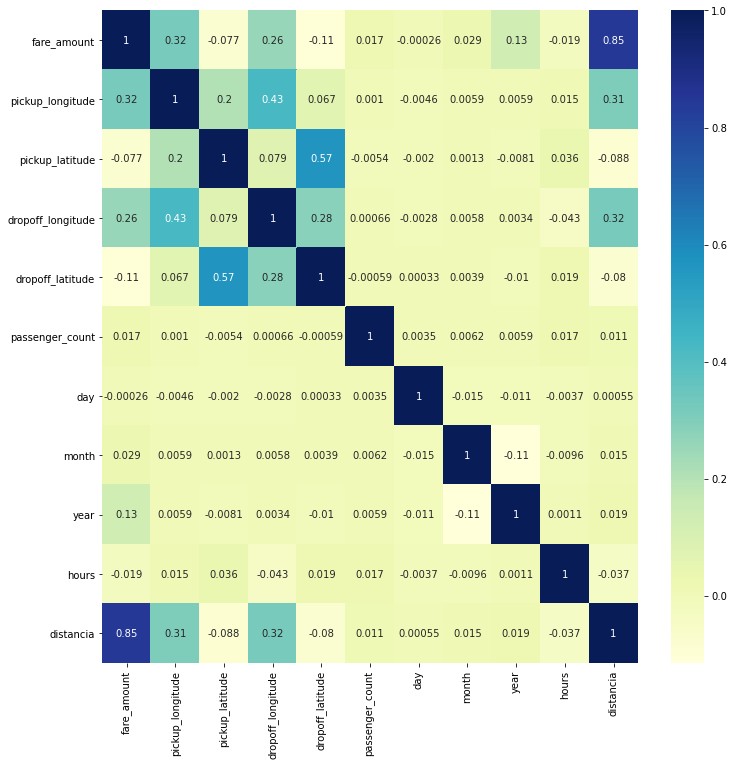

In [44]:
plt.figure(figsize=(12,12))

correlacion = df_final.corr(method='pearson')

sns.heatmap(correlacion, annot=True,  cmap="YlGnBu")
plt.show()

## 4. Modelamiento

In [64]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, average_precision_score, precision_recall_curve
 

X = df_final[["distancia","passenger_count","year","month","pickup_longitude","dropoff_longitude","pickup_latitude","dropoff_latitude"]]
y = df_final[["fare_amount"]]

X = np.round(X, decimals = 6) 
y = np.round(y, decimals = 6) 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

clf = Lasso(alpha = 0.0001)
clf.fit(X_train, y_train)

score = clf.score(X_train,y_train)
 
print("Metrica del modelo", score)

#scores = cross_val_score(clf, X_train, y_train,scoring="accuracy")
#print("Metricas cross_validation", scores)


Metrica del modelo 0.7369055646213634


## 5. Optimización y forecasting